# importing necessary libraries

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, auc,roc_curve
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import precision_recall_fscore_support

# importing dataset

In [2]:
df=pd.read_csv('D:/SASTRA UNIVERSITY/Mini_Project/clean.csv')
df1=pd.read_csv('D:/SASTRA UNIVERSITY/Mini_Project/testing2.csv')
print(df.shape)

(68909, 36)


# Splitting the inputs and output

In [3]:
X_train = df.iloc[:,1:-1].values
y_train = df.iloc[:,-1].values
X_test = df1.iloc[:,1:-1].values
y_test = df1.iloc[:,-1].values


# Splitting the dataset into train and test set

# Feature scaling using z-score method

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic regression

Accuracy: 90.71%
Precision: 98.22%
Recall: 66.25%
F1 Score: 79.13%
Confusion Matrix:
 [[14618    64]
 [ 1795  3524]]


d:\sastra university\program files\python compiler\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


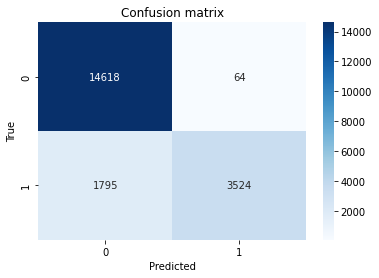

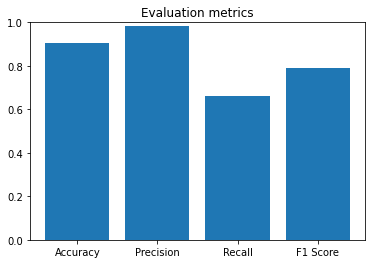

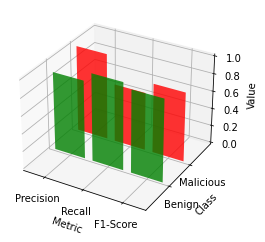

In [5]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, num_iters=100000, fit_intercept=True):
        self.lr = lr
        self.num_iters = num_iters
        self.fit_intercept = fit_intercept
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iters):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.6):
        return self.predict_prob(X) >= threshold

    


lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predLR = lr.predict(X_test)



accuracy = accuracy_score(y_test, y_predLR)
precision = precision_score(y_test, y_predLR)
recall = recall_score(y_test, y_predLR)
f1 = f1_score(y_test, y_predLR)
l1 = accuracy
l2 = precision
l3 = recall
l4 = f1

cm = confusion_matrix(y_test, y_predLR)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')

metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_scores = [accuracy, precision, recall, f1]
plt.figure()
plt.bar(np.arange(len(metric_labels)), metric_scores)
plt.xticks(np.arange(len(metric_labels)), metric_labels)
plt.ylim([0, 1])
plt.title('Evaluation metrics')
plt.show()


precision, recall, f1_scor, _ = precision_recall_fscore_support(y_test, y_predLR, average=None)

benign = [precision[0], recall[0], f1_scor[0]]
malicious = [precision[1], recall[1], f1_scor[1]]
index = [0.5, 1.5, 2.5]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar(index, malicious, zs=1, zdir='y', color='r', alpha=0.8)

ax.bar(index, benign, zs=0, zdir='y', color='g', alpha=0.8)

ax.set_xlabel('Metric')
ax.set_ylabel('Class')
ax.set_zlabel('Value')
ax.set_xticks(index)
ax.set_xticklabels(['Precision', 'Recall', 'F1-Score'])

ax.set_yticks([0, 1])
ax.set_yticklabels(['Benign', 'Malicious'])

ax.set_xlim(0, 3)
ax.set_ylim(-1, 2)
ax.set_zlim(0, 1)
plt.show()



# Random forest 

Accuracy: 33.72%
Precision: 27.89%
Recall: 94.12%
F1 Score: 43.03%
Confusion Matrix:
 [[ 1739 12943]
 [  313  5006]]


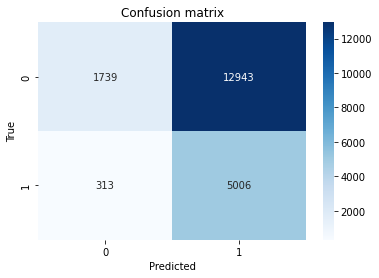

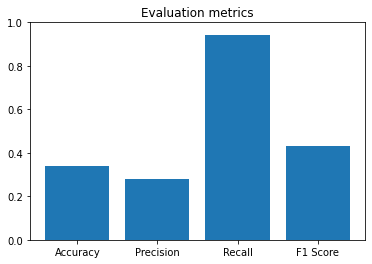

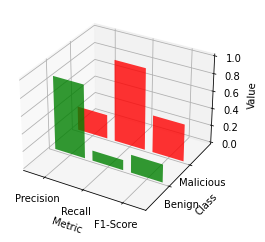

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)  
rf.fit(X_train, y_train)
  
y_predRF = rf.predict(X_test) 
  
accuracy = accuracy_score(y_test, y_predRF)
precision = precision_score(y_test, y_predRF)
recall = recall_score(y_test, y_predRF)
f1 = f1_score(y_test, y_predRF)

r1 = accuracy
r2 = precision
r3 = recall
r4 = f1

cm = confusion_matrix(y_test, y_predRF)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')

metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_scores = [accuracy, precision, recall, f1]
plt.figure()
plt.bar(np.arange(len(metric_labels)), metric_scores)
plt.xticks(np.arange(len(metric_labels)), metric_labels)
plt.ylim([0, 1])
plt.title('Evaluation metrics')
plt.show()

precision, recall, f1_scor, _ = precision_recall_fscore_support(y_test, y_predRF, average=None)

benign = [precision[0], recall[0], f1_scor[0]]
malicious = [precision[1], recall[1], f1_scor[1]]
index = [0.5, 1.5, 2.5]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar(index, malicious, zs=1, zdir='y', color='r', alpha=0.8)

ax.bar(index, benign, zs=0, zdir='y', color='g', alpha=0.8)

ax.set_xlabel('Metric')
ax.set_ylabel('Class')
ax.set_zlabel('Value')
ax.set_xticks(index)
ax.set_xticklabels(['Precision', 'Recall', 'F1-Score'])

ax.set_yticks([0, 1])
ax.set_yticklabels(['Benign', 'Malicious'])

ax.set_xlim(0, 3)
ax.set_ylim(-1, 2)
ax.set_zlim(0, 1)
plt.show()





# K-nearest neighbours

Accuracy: 30.93%
Precision: 26.47%
Recall: 89.81%
F1 Score: 40.88%
Confusion Matrix:
 [[ 1409 13273]
 [  542  4777]]


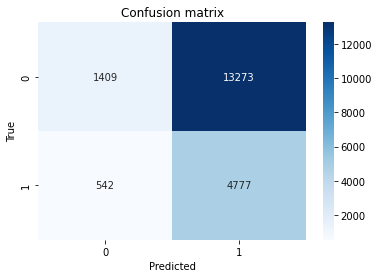

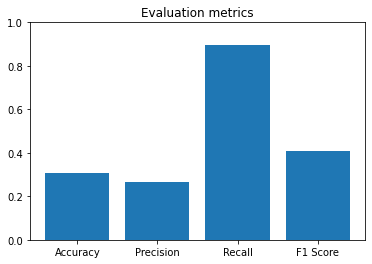

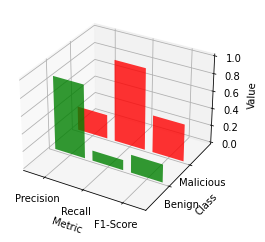

In [7]:
import numpy as np
import heapq
class KNNClassifier:
    def _init_(self):
        self.k = 5

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = np.sqrt(np.sum(np.square(self.X_train - x), axis=1))
            k_nearest_heap = []
            for i in range(len(distances)):
                if len(k_nearest_heap) < 5:
                    heapq.heappush(k_nearest_heap, (-distances[i], self.y_train[i]))
                else:
                    if -distances[i] > k_nearest_heap[0][0]:
                        heapq.heappop(k_nearest_heap)
                        heapq.heappush(k_nearest_heap, (-distances[i], self.y_train[i]))
            labels = [label for _, label in k_nearest_heap]
            y_pred.append(max(set(labels), key=labels.count))
        return y_pred
    
knn = KNNClassifier()
knn.fit(X_train, y_train)

y_predKNN = knn.predict(X_test)

 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_predKNN)
precision = precision_score(y_test, y_predKNN)
recall = recall_score(y_test, y_predKNN)
f1 = f1_score(y_test, y_predKNN)

k1 = accuracy
k2 = precision
k3 = recall
k4 = f1

cm = confusion_matrix(y_test, y_predKNN)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')

metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_scores = [accuracy, precision, recall, f1]
plt.figure()
plt.bar(np.arange(len(metric_labels)), metric_scores)
plt.xticks(np.arange(len(metric_labels)), metric_labels)
plt.ylim([0, 1])
plt.title('Evaluation metrics')
plt.show()


precision, recall, f1_scor, _ = precision_recall_fscore_support(y_test, y_predRF, average=None)

benign = [precision[0], recall[0], f1_scor[0]]
malicious = [precision[1], recall[1], f1_scor[1]]
index = [0.5, 1.5, 2.5]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar(index, malicious, zs=1, zdir='y', color='r', alpha=0.8)

ax.bar(index, benign, zs=0, zdir='y', color='g', alpha=0.8)

ax.set_xlabel('Metric')
ax.set_ylabel('Class')
ax.set_zlabel('Value')
ax.set_xticks(index)
ax.set_xticklabels(['Precision', 'Recall', 'F1-Score'])

ax.set_yticks([0, 1])
ax.set_yticklabels(['Benign', 'Malicious'])

ax.set_xlim(0, 3)
ax.set_ylim(-1, 2)
ax.set_zlim(0, 1)
plt.show()


# Support Vector Machine

Accuracy: 35.77%
Precision: 28.42%
Recall: 93.21%
F1 Score: 43.56%
Confusion Matrix:
 [[ 2196 12486]
 [  361  4958]]


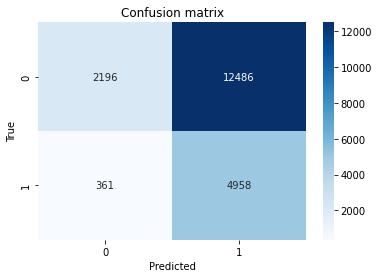

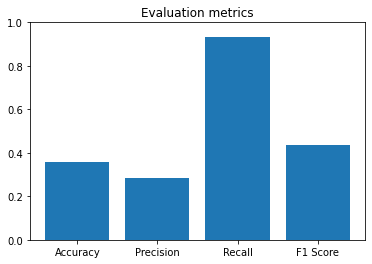

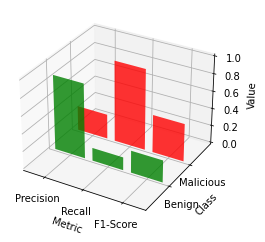

In [8]:
from sklearn.svm import SVC  
svc = SVC(kernel='rbf') 

svc.fit(X_train, y_train) 
y_predSVC = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_predSVC)
precision = precision_score(y_test, y_predSVC)
recall = recall_score(y_test, y_predSVC)
f1 = f1_score(y_test, y_predSVC)

s1 = accuracy
s2 = precision
s3 = recall
s4 = f1

cm = confusion_matrix(y_test, y_predSVC)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')

metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_scores = [accuracy, precision, recall, f1]
plt.figure()
plt.bar(np.arange(len(metric_labels)), metric_scores)
plt.xticks(np.arange(len(metric_labels)), metric_labels)
plt.ylim([0, 1])
plt.title('Evaluation metrics')
plt.show()


precision, recall, f1_scor, _ = precision_recall_fscore_support(y_test, y_predSVC, average=None)

benign = [precision[0], recall[0], f1_scor[0]]
malicious = [precision[1], recall[1], f1_scor[1]]
index = [0.5, 1.5, 2.5]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar(index, malicious, zs=1, zdir='y', color='r', alpha=0.8)

ax.bar(index, benign, zs=0, zdir='y', color='g', alpha=0.8)

ax.set_xlabel('Metric')
ax.set_ylabel('Class')
ax.set_zlabel('Value')
ax.set_xticks(index)
ax.set_xticklabels(['Precision', 'Recall', 'F1-Score'])

ax.set_yticks([0, 1])
ax.set_yticklabels(['Benign', 'Malicious'])

ax.set_xlim(0, 3)
ax.set_ylim(-1, 2)
ax.set_zlim(0, 1)
plt.show()


# Gaussian Naive Bayes

In [10]:
import numpy as np
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.num_classes = len(self.classes)
        self.means = []
        self.variances = []
        self.class_prior = []
        
        for i in range(self.num_classes):
            X_class = X[y == self.classes[i]]
            self.means.append(np.mean(X_class, axis=0))
            self.variances.append(np.var(X_class, axis=0) + 0.0102)
            self.class_prior.append(len(X_class) / len(X))
    
    def predict(self, X):
        log_posterior = np.zeros((X.shape[0], self.num_classes))
        
        for i in range(self.num_classes):
            mean = self.means[i]
            variance = self.variances[i]
            prior = np.log(self.class_prior[i])
            
            log_likelihood = np.sum(-0.5 * np.log(2 * np.pi * variance)
                                     - 0.5 * ((X - mean) ** 2 / variance), axis=1)
            
            log_posterior[:, i] = log_likelihood + prior
        
        return self.classes[np.argmax(log_posterior, axis=1)]



Accuracy: 36.45%
Precision: 19.64%
Recall: 44.93%
F1 Score: 27.33%
Confusion Matrix:
 [[4900 9782]
 [2929 2390]]


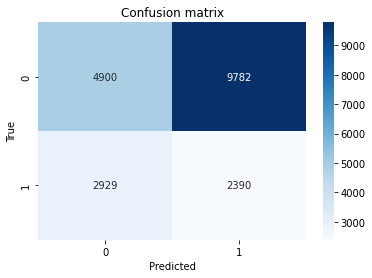

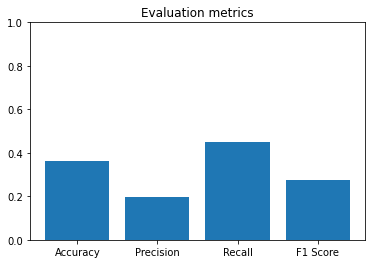

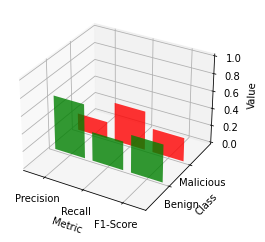

In [12]:
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

y_predNB = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_predNB)
precision = precision_score(y_test, y_predNB)
recall = recall_score(y_test, y_predNB)
f1 = f1_score(y_test, y_predNB)

n1 = accuracy
n2 = precision
n3 = recall
n4 = f1

cm = confusion_matrix(y_test, y_predNB)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')

metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_scores = [accuracy, precision, recall, f1]
plt.figure()
plt.bar(np.arange(len(metric_labels)), metric_scores)
plt.xticks(np.arange(len(metric_labels)), metric_labels)
plt.ylim([0, 1])
plt.title('Evaluation metrics')
plt.show()


precision, recall, f1_scor, _ = precision_recall_fscore_support(y_test, y_predNB, average=None)

benign = [precision[0], recall[0], f1_scor[0]]
malicious = [precision[1], recall[1], f1_scor[1]]
index = [0.5, 1.5, 2.5]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar(index, malicious, zs=1, zdir='y', color='r', alpha=0.8)

ax.bar(index, benign, zs=0, zdir='y', color='g', alpha=0.8)

ax.set_xlabel('Metric')
ax.set_ylabel('Class')
ax.set_zlabel('Value')
ax.set_xticks(index)
ax.set_xticklabels(['Precision', 'Recall', 'F1-Score'])

ax.set_yticks([0, 1])
ax.set_yticklabels(['Benign', 'Malicious'])

ax.set_xlim(0, 3)
ax.set_ylim(-1, 2)
ax.set_zlim(0, 1)
plt.show()



# Aritificial Neural Networks

# PLOTS FOR COMPARISON

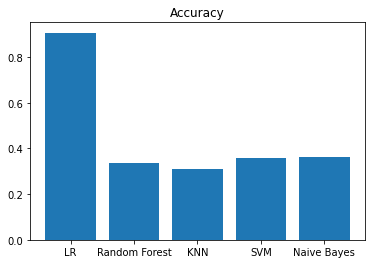

In [20]:
x_values = [0, 1, 2, 3, 4]
y_values = [l1, r1, k1, s1, n1]

x_labels = ['LR', 'Random Forest', 'KNN', 'SVM','Naive Bayes']
plt.xticks(x_values, x_labels)

#plt.plot(x_values, y_values, '-o')
plt.bar(np.arange(len(x_values)), y_values)
plt.title('Accuracy')
plt.show()

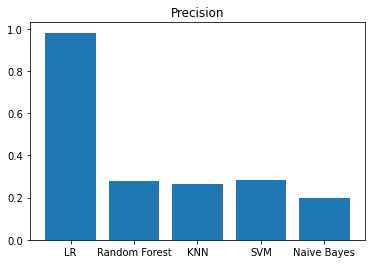

In [21]:
x_values = [0, 1, 2, 3, 4]
y_values = [l2, r2, k2, s2, n2]

x_labels = ['LR', 'Random Forest', 'KNN', 'SVM','Naive Bayes']
plt.xticks(x_values, x_labels)

plt.bar(np.arange(len(x_values)), y_values)
plt.title('Precision')
plt.show()

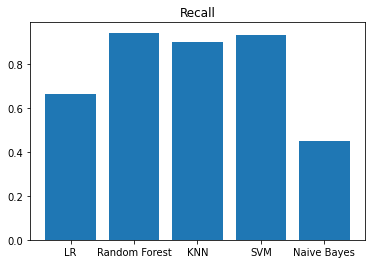

In [22]:
x_values = [0, 1, 2, 3, 4]
y_values = [l3, r3, k3, s3, n3]

x_labels = ['LR', 'Random Forest', 'KNN', 'SVM','Naive Bayes']
plt.xticks(x_values, x_labels)

plt.bar(np.arange(len(x_values)), y_values)

plt.title('Recall')
plt.show()